In [11]:
%run "../../../common/0_notebooks_base_setup.py"    

c:\Users\jaayg\OneDrive\Documentos\Data_Science\04.Estadistica_descriptiva\clase_04\dsad_2021\common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
Running command `conda install --yes pandas=1.1.5`... 

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Checkpoint Estadística Descriptiva

Para esta práctica usaremos un subconjunto de los registros de un dataset de Kaggle que tiene datos oceanográficos https://www.kaggle.com/sohier/calcofi

El conjunto de datos de CalCOFI representa la serie cronológica más larga (desde 1949 hasta el presente) y más completa (más de 50.000 estaciones de muestreo) de datos oceanográficos y de larvas de peces del mundo. 

Incluye datos sobre la abundancia de las larvas de más de 250 especies de peces; datos de frecuencia de tallas de larvas y datos de abundancia de huevos en especies comerciales clave; y datos oceanográficos y de plancton. 

Los datos físicos, químicos y biológicos recopilados a intervalos regulares de tiempo y espacio son valiosos para documentar los ciclos climáticos en la corriente de California y una variedad de respuestas biológicas a esos ciclos. 

La idea de esta práctica es analizar las variables numéricas de este dataset reducido (sólo cinco estaciones de muestreo) calculando medidas de tendencia central, de dispersión, y de asociación entre esas variables.


## Ejercicio 1
Leer los datos del archivo /M1/CLASE_04_EstadisticaDescriptiva/Data/bottle_reducido.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Cada uno del los registros del dataset representa una medición en una estación. Las variables medidas son profundidad, temperatura, saturación de oxígeno, nivel de salinidad.

Las columnas son:

* **Sta_ID**: cadena de caracteres, representa el id de la estación

* **Depth_ID**: cadena de caracteres, representa el id de la medición

* **Depthm**: numérico, representa la profundidad en metros 

* **T_degC**: numérico, representa la temperatura en grados centigrados

* **O2Sat**: numérico, representa la saturación de oxígeno

* **Salnty**: numérico, representa el nivel de salinidad

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [2]:
import numpy as np

# local:
data_location = '../Data/bottle_reducido.csv'

In [3]:
data = np.genfromtxt(data_location, skip_header=1, delimiter='\t', dtype=str)
data

array([['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0000B-3', '0',
        '10.3', '92.8', '33.03'],
       ['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0006A-3', '6',
        '18.46', '111.8', '32.92'],
       ['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0010A-7', '10',
        '10.29', '95.0', '32.951'],
       ...,
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1100A-7', '1100',
        '3.51', '6.4', '34.44'],
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1200A-7', '1200',
        '3.29', '7.3', '34.481'],
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1247A-3', '1247',
        '3.18', '7.6', '34.5']], dtype='<U38')

In [4]:
data_int = np.genfromtxt(data_location, skip_header=1, delimiter='\t', dtype=int)
data_int

##Los primeros valores me los imprime como un -1

array([[  -1,   -1,    0,   10,   92,   33],
       [  -1,   -1,    6,   18,  111,   32],
       [  -1,   -1,   10,   10,   95,   32],
       ...,
       [  -1,   -1, 1100,    3,    6,   34],
       [  -1,   -1, 1200,    3,    7,   34],
       [  -1,   -1, 1247,    3,    7,   34]])

In [5]:
data_floar = np.genfromtxt(data_location, skip_header=1, delimiter='\t', dtype=float)
data_floar

#Este guarda esos valores como un nan

array([[     nan,      nan,    0.   ,   10.3  ,   92.8  ,   33.03 ],
       [     nan,      nan,    6.   ,   18.46 ,  111.8  ,   32.92 ],
       [     nan,      nan,   10.   ,   10.29 ,   95.   ,   32.951],
       ...,
       [     nan,      nan, 1100.   ,    3.51 ,    6.4  ,   34.44 ],
       [     nan,      nan, 1200.   ,    3.29 ,    7.3  ,   34.481],
       [     nan,      nan, 1247.   ,    3.18 ,    7.6  ,   34.5  ]])

## Ejercicio 2

Sobre los datos de nivel de salinidad (columna Salnty) calcular:

* media

* mediana 

* desvio

* rango


In [6]:
salinity_column_index = 5
salinity_vector = data[:, salinity_column_index]
salinity_vector_numeric = salinity_vector.astype(float)

In [7]:
salinity_vector_numeric

array([33.03 , 32.92 , 32.951, 32.99 , 33.005, 33.054, 33.06 , 33.15 ,
       33.167, 33.26 , 33.381, 33.64 , 33.656, 33.81 , 33.84 , 33.891,
       33.96 , 33.966, 34.058, 34.136, 34.23 , 34.232, 34.232, 34.22 ,
       34.241, 34.313, 34.386, 34.4  , 32.63 , 32.74 , 32.738, 32.722,
       32.72 , 32.78 , 32.9  , 32.941, 33.08 , 33.219, 33.33 , 33.506,
       33.62 , 33.627, 33.78 , 33.86 , 33.951, 33.96 , 34.026, 34.037,
       34.02 , 34.065, 34.11 , 34.12 , 34.195, 34.271, 34.31 , 33.96 ,
       32.79 , 32.767, 32.744, 32.74 , 32.74 , 32.74 , 32.755, 32.83 ,
       32.87 , 32.92 , 33.139, 33.49 , 33.51 , 33.716, 33.78 , 33.943,
       34.02 , 34.037, 34.069, 34.07 , 34.111, 34.14 , 34.168, 34.247,
       34.317, 34.33 , 34.319, 34.306, 34.295, 34.29 , 32.75 , 32.81 ,
       32.808, 32.774, 32.77 , 32.795, 32.83 , 32.798, 32.75 , 33.014,
       33.19 , 33.428, 33.58 , 33.637, 33.8  , 33.82 , 33.929, 33.94 ,
       33.955, 33.979, 33.98 , 34.041, 34.08 , 34.113, 34.185, 34.248,
      

In [8]:
media = np.mean(salinity_vector_numeric)
media

33.601653746770026

In [9]:
media = np.median(salinity_vector_numeric)
media

33.8485

In [10]:
varianza =  np.std(salinity_vector_numeric)
varianza

0.6562158205240991

In [11]:
rango = np.max(salinity_vector_numeric) - np.min(salinity_vector_numeric)
rango

2.3600000000000065

## Ejercicio 3

Usando la función `distribution_plotter` graficar las distribuciones de las variables Depthm, T_degC, O2Sat, Salnty

<code>

import seaborn as sns

def distribution_plotter(data, label, bin_width=100):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)
</code>


Qué pueden decir de estas distribuciones?

Pongan atención en la elección del parámetro `bin_width` para que el gráfico sea informativo.


In [12]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=100):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [14]:
#Establecemos los indices de las colunas respectivas
depthm_column_index = 2
tdegC_column_index = 3
o2sat_column_index = 4

depthm_vector_numeric = data[:, depthm_column_index].astype(float)
tdegC_vector_numeric = data[:, tdegC_column_index].astype(float)
o2sat_vector_numeric = data[:, o2sat_column_index].astype(float)


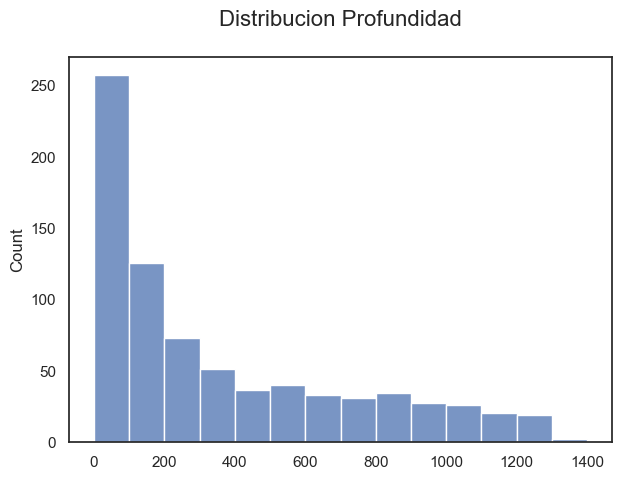

In [15]:
distribution_plotter(depthm_vector_numeric, 'Profundidad')

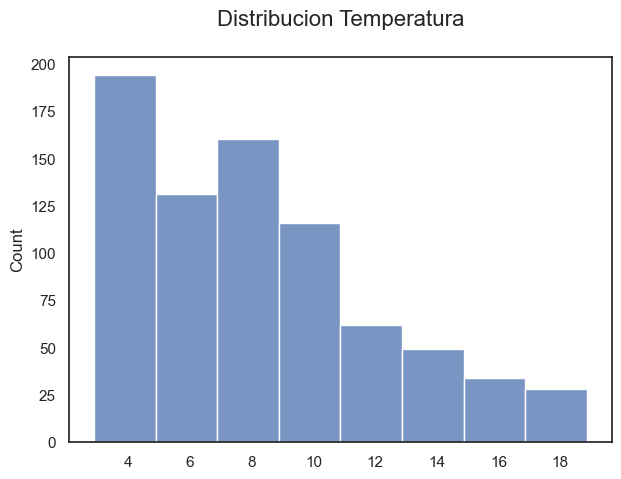

In [25]:
distribution_plotter(tdegC_vector_numeric, 'Temperatura', 2)

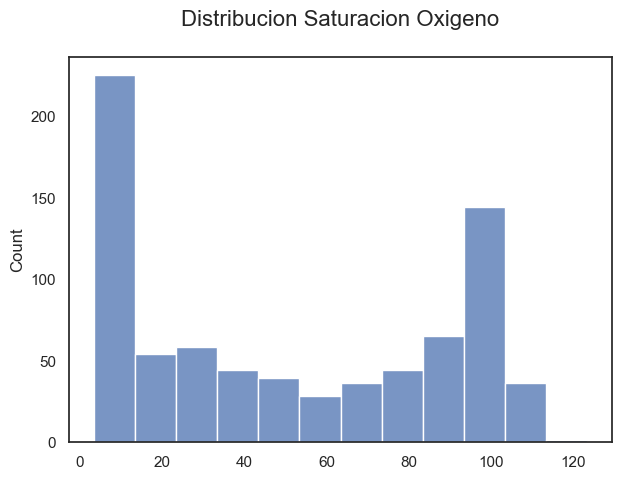

In [23]:
distribution_plotter(o2sat_vector_numeric, 'Saturacion Oxigeno', 10)

## Ejercicio 4

Calcular las matrices de correlación y covarianza de las variables Depthm, T_degC, O2Sat, Salnty

A partir de estos resultados, elegir sólo una de estas variables para intentar predecir el valor de salinidad:

* ¿Usarían para esto la matriz de correlación o la de covarianzas? ¿Por qué?

* ¿Qué variable elegirían? Justificar la decisión.



In [26]:
variables_colums_index = range(2,6)

X = data[:, variables_colums_index].astype(float)

X

array([[   0.   ,   10.3  ,   92.8  ,   33.03 ],
       [   6.   ,   18.46 ,  111.8  ,   32.92 ],
       [  10.   ,   10.29 ,   95.   ,   32.951],
       ...,
       [1100.   ,    3.51 ,    6.4  ,   34.44 ],
       [1200.   ,    3.29 ,    7.3  ,   34.481],
       [1247.   ,    3.18 ,    7.6  ,   34.5  ]])

In [29]:
cov = np.cov(X.T)
cov

array([[ 1.22730122e+05, -1.11538543e+03, -1.10802454e+04,
         1.92117557e+02],
       [-1.11538543e+03,  1.54435978e+01,  1.32676236e+02,
        -2.36152167e+00],
       [-1.10802454e+04,  1.32676236e+02,  1.42106646e+03,
        -2.40228614e+01],
       [ 1.92117557e+02, -2.36152167e+00, -2.40228614e+01,
         4.31176278e-01]])

In [30]:
corr = np.corrcoef(X.T)
corr

array([[ 1.        , -0.81016811, -0.83900896,  0.83514915],
       [-0.81016811,  1.        ,  0.8955951 , -0.91514575],
       [-0.83900896,  0.8955951 ,  1.        , -0.97048787],
       [ 0.83514915, -0.91514575, -0.97048787,  1.        ]])

In [31]:
xdepthm_column_index = 0
xtdegc_column_index = 1
xo2sat_column_index = 2
xsalinity_column_index = 3


In [32]:
covarianzas_salinity = [ abs(cov[xsalinity_column_index, xdepthm_column_index]), 
                         abs(cov[xsalinity_column_index, xtdegc_column_index]), 
                        abs(cov[xsalinity_column_index, xo2sat_column_index]), 
                       ]

correlacion_salinity = [ abs(corr[xsalinity_column_index, xdepthm_column_index]), 
                         abs(corr[xsalinity_column_index, xtdegc_column_index]), 
                         abs(corr[xsalinity_column_index, xo2sat_column_index]), 
                       ]

np.argmax(covarianzas_salinity)

0

In [33]:
np.argmax(correlacion_salinity)

2

Escogeriamos la variable de saturacion del oxigeno pues es la que tiene mayor correlacion con respecto a la salinidad en la matriz de correlacion la cual esta estandarizada.
